In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d albertovidalrod/electricity-consumption-uk-20092022

 92% 18.0M/19.5M [00:01<00:00, 21.2MB/s]
100% 19.5M/19.5M [00:01<00:00, 13.4MB/s]


In [ ]:
!unzip electricity-consumption-uk-20092022.zip

Archive:  electricity-consumption-uk-20092022.zip
  inflating: historic_demand_2009_2024.csv  
  inflating: historic_demand_2009_2024_noNaN.csv  
  inflating: historic_demand_year_2009.csv  
  inflating: historic_demand_year_2010.csv  
  inflating: historic_demand_year_2011.csv  
  inflating: historic_demand_year_2012.csv  
  inflating: historic_demand_year_2013.csv  
  inflating: historic_demand_year_2014.csv  
  inflating: historic_demand_year_2015.csv  
  inflating: historic_demand_year_2016.csv  
  inflating: historic_demand_year_2017.csv  
  inflating: historic_demand_year_2018.csv  
  inflating: historic_demand_year_2019.csv  
  inflating: historic_demand_year_2020.csv  
  inflating: historic_demand_year_2021.csv  
  inflating: historic_demand_year_2022.csv  
  inflating: historic_demand_year_2023.csv  
  inflating: historic_demand_year_2024.csv  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')
plt.style.use('bmh')
import datetime as dt

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/historic_demand_2009_2024_noNaN.csv',parse_dates=[1])
df

settlement_date settlement_period period_hour     nd    tsd  \
0       2009-01-01 00:00:00                 1     0:00:00  37910  38704   
1       2009-01-01 00:30:00                 2     0:30:00  38047  38964   
2       2009-01-01 01:00:00                 3     1:00:00  37380  38651   
3       2009-01-01 01:30:00                 4     1:30:00  36426  37775   
4       2009-01-01 02:00:00                 5     2:00:00  35687  37298   
...                     ...               ...         ...    ...    ...   
266413  2024-03-28 21:30:00                44    21:30:00  28453  30049   
266414  2024-03-28 22:00:00                45    22:00:00  27089  28693   
266415  2024-03-28 22:30:00                46    22:30:00  26098  27700   
266416  2024-03-28 23:00:00                47    23:00:00  24524  26582   
266417  2024-03-28 23:30:00                48    23:30:00  23856  26098   

        england_wales_demand  embedded_wind_generation  \
0                      33939                        54   
1                      34072                        53   
2                      33615                        53   
3                      32526                        50   
4                      31877                        50   
...                      ...                       ...   
266413                 25833                      3139   
266414                 24637                      3023   
266415                 23675                      2907   
266416                 22237                      2634   
266417                 21505                      2360   

        embedded_wind_capacity  embedded_solar_generation  \
0                         1403                          0   
1                         1403                          0   
2                         1403                          0   
3                         1403                          0   
4                         1403                          0   
...                        ...                        ...   
266413                    6562                          0   
266414                    6562                          0   
266415                    6562                          0   
266416                    6562                          0   
266417                    6562                          0   

        embedded_solar_capacity  non_bm_stor  pump_storage_pumping  ifa_flow  \
0                             0            0                    33      2002   
1                             0            0                   157      2002   
2                             0            0                   511      2002   
3                             0            0                   589      1772   
4                             0            0                   851      1753   
...                         ...          ...                   ...       ...   
266413                    15905            0                    14      1686   
266414                    15905            0                    21      1975   
266415                    15905            0                    20      1996   
266416                    15905            0                   475      1815   
266417                    15905            0                   659      1801   

        ifa2_flow  britned_flow  moyle_flow  east_west_flow  nemo_flow  \
0               0             0        -161               0          0   
1               0             0        -160               0          0   
2               0             0        -160               0          0   
3               0             0        -160               0          0   
4               0             0        -160               0          0   
...           ...           ...         ...             ...        ...   
266413        991          1004        -451            -531        914   
266414        991          1004        -452            -531        631   
266415        991          1003        -451           

In [ ]:
new_columns_name=['nd','tsd','ewd','em_wind_gen','em_wind_cap',
'em_solar_gen','em_solar_cap','non_balacing_mech_stor','pump_storage_pumping','is_holiday']
df.isna().sum()

settlement_date              0
settlement_period            0
period_hour                  0
nd                           0
tsd                          0
england_wales_demand         0
embedded_wind_generation     0
embedded_wind_capacity       0
embedded_solar_generation    0
embedded_solar_capacity      0
non_bm_stor                  0
pump_storage_pumping         0
ifa_flow                     0
ifa2_flow                    0
britned_flow                 0
moyle_flow                   0
east_west_flow               0
nemo_flow                    0
is_holiday                   0
dtype: int64

In [ ]:


# Convert 'settlement_date' column to datetime type
df['settlement_date'] = pd.to_datetime(df['settlement_date'])

# Filter the DataFrame to include only rows starting from '2018-01-01'
df = df[df['settlement_date'] >= '2018-01-01']

# Extract date part from 'settlement_date'
df['date'] = df['settlement_date'].dt.date

# Group by date and calculate mean
data = df.groupby('date').agg({
    'nd': 'mean',
    'tsd': 'mean',
    'england_wales_demand': 'mean',
    'embedded_wind_generation': 'mean',
    'embedded_wind_capacity': 'mean',
    'embedded_solar_generation': 'mean',
    'embedded_solar_capacity': 'mean',
    'non_bm_stor': 'mean',
    'pump_storage_pumping': 'mean',
    'is_holiday': 'mean'
})

# Reset index to make 'date' a regular column
data.reset_index(inplace=True)

# Keep only desired columns
data = data[['date', 'nd', 'tsd', 'england_wales_demand', 'embedded_wind_generation',
             'embedded_wind_capacity', 'embedded_solar_generation', 'embedded_solar_capacity',
             'non_bm_stor', 'pump_storage_pumping', 'is_holiday']]


data


date            nd           tsd  england_wales_demand  \
0     2018-01-01  29072.041667  30282.333333          26426.250000   
1     2018-01-02  34863.416667  36009.041667          32155.645833   
2     2018-01-03  34499.708333  35690.979167          31515.562500   
3     2018-01-04  36414.145833  37628.979167          32892.625000   
4     2018-01-05  36975.916667  38260.333333          33564.145833   
...          ...           ...           ...                   ...   
2274  2024-03-24  23923.083333  26401.166667          21748.979167   
2275  2024-03-25  29342.562500  31125.000000          26796.604167   
2276  2024-03-26  28847.895833  30341.250000          26400.104167   
2277  2024-03-27  28054.270833  30205.666667          25644.104167   
2278  2024-03-28  27897.083333  30000.375000          25571.083333   

      embedded_wind_generation  embedded_wind_capacity  \
0                  2393.604167                  5754.0   
1                  2398.333333                  5754.0   
2                  3666.583333                  5754.0   
3                  1954.979167                  5754.0   
4                  1288.437500                  5754.0   
...                        ...                     ...   
2274               2298.791667                  6562.0   
2275               1866.562500                  6562.0   
2276               1419.041667                  6562.0   
2277               2695.333333                  6562.0   
2278               3209.833333                  6562.0   

      embedded_solar_generation  embedded_solar_capacity  non_bm_stor  \
0                    341.958333                  12916.0     0.000000   
1                     67.625000                  12916.0     0.000000   
2                    423.062500                  12916.0     0.000000   
3                    203.729167                  12916.0     0.000000   
4                    376.104167                  12916.0    29.104167   
...                         ...                      ...          ...   
2274                2275.604167                  15905.0     0.000000   
2275                 980.375000                  15905.0     0.000000   
2276                1645.708333                  15905.0     0.000000   
2277                1722.916667                  15905.0     0.000000   
2278                1393.375000                  15905.0     0.000000   

      pump_storage_pumping  is_holiday  
0               466.979167         1.0  
1               383.375000         0.0  
2               351.916667         0.0  
3               397.916667         0.0  
4               347.500000         0.0  
...                    ...         ...  
2274            413.583333         0.0  
2275            162.875000         0.0  
2276            142.333333         0.0  
2277            282.604167         0.0  
2278            334.708333         0.0  

[2279 rows x 11 columns]

In [ ]:
des=data.describe().T.reset_index()
des

index   count          mean          std           min  \
0                         nd  2279.0  28040.211804  4439.215512  17560.187500   
1                        tsd  2279.0  29682.861615  4376.644533  19465.666667   
2       england_wales_demand  2279.0  25637.269496  4084.978251  16450.625000   
3   embedded_wind_generation  2279.0   1744.603289   962.795453    275.541667   
4     embedded_wind_capacity  2279.0   6370.545698   251.368640   5754.000000   
5  embedded_solar_generation  2279.0   1337.231892   864.227758     37.625000   
6    embedded_solar_capacity  2279.0  13697.444877  1014.994873  12916.000000   
7                non_bm_stor  2279.0      4.292357    15.791054      0.000000   
8       pump_storage_pumping  2279.0    223.903040   110.997971      2.916667   
9                 is_holiday  2279.0      0.022817     0.149353      0.000000   

            25%           50%           75%           max  
0  24644.906250  27661.937500  31271.687500  40297.229167  
1  26519.020833  29213.062500  32703.166667  42152.291667  
2  22524.072917  25280.416667  28694.260417  37573.791667  
3    964.750000   1571.250000   2384.114583   5174.812500  
4   6182.000000   6527.000000   6538.000000   6573.395833  
5    593.312500   1226.958333   2014.427083   3479.833333  
6  13080.000000  13080.000000  13861.000000  15954.000000  
7      0.000000      0.000000      0.000000    151.270833  
8    146.916667    221.375000    300.906250    580.250000  
9      0.000000      0.000000      0.000000      1.000000

In [ ]:
c=pd.melt(des,id_vars='index',value_vars=des.columns,value_name='g')
c

index variable             g
0                          nd    count   2279.000000
1                         tsd    count   2279.000000
2        england_wales_demand    count   2279.000000
3    embedded_wind_generation    count   2279.000000
4      embedded_wind_capacity    count   2279.000000
..                        ...      ...           ...
75  embedded_solar_generation      max   3479.833333
76    embedded_solar_capacity      max  15954.000000
77                non_bm_stor      max    151.270833
78       pump_storage_pumping      max    580.250000
79                 is_holiday      max      1.000000

[80 rows x 3 columns]

In [ ]:
import calendar
lab=['National ','Transmission System ','ENGLAND_WALES']
co=['darkviolet','tomato','darkorange']
data.columns

Index(['date', 'nd', 'tsd', 'england_wales_demand', 'embedded_wind_generation',
       'embedded_wind_capacity', 'embedded_solar_generation',
       'embedded_solar_capacity', 'non_bm_stor', 'pump_storage_pumping',
       'is_holiday'],
      dtype='object')

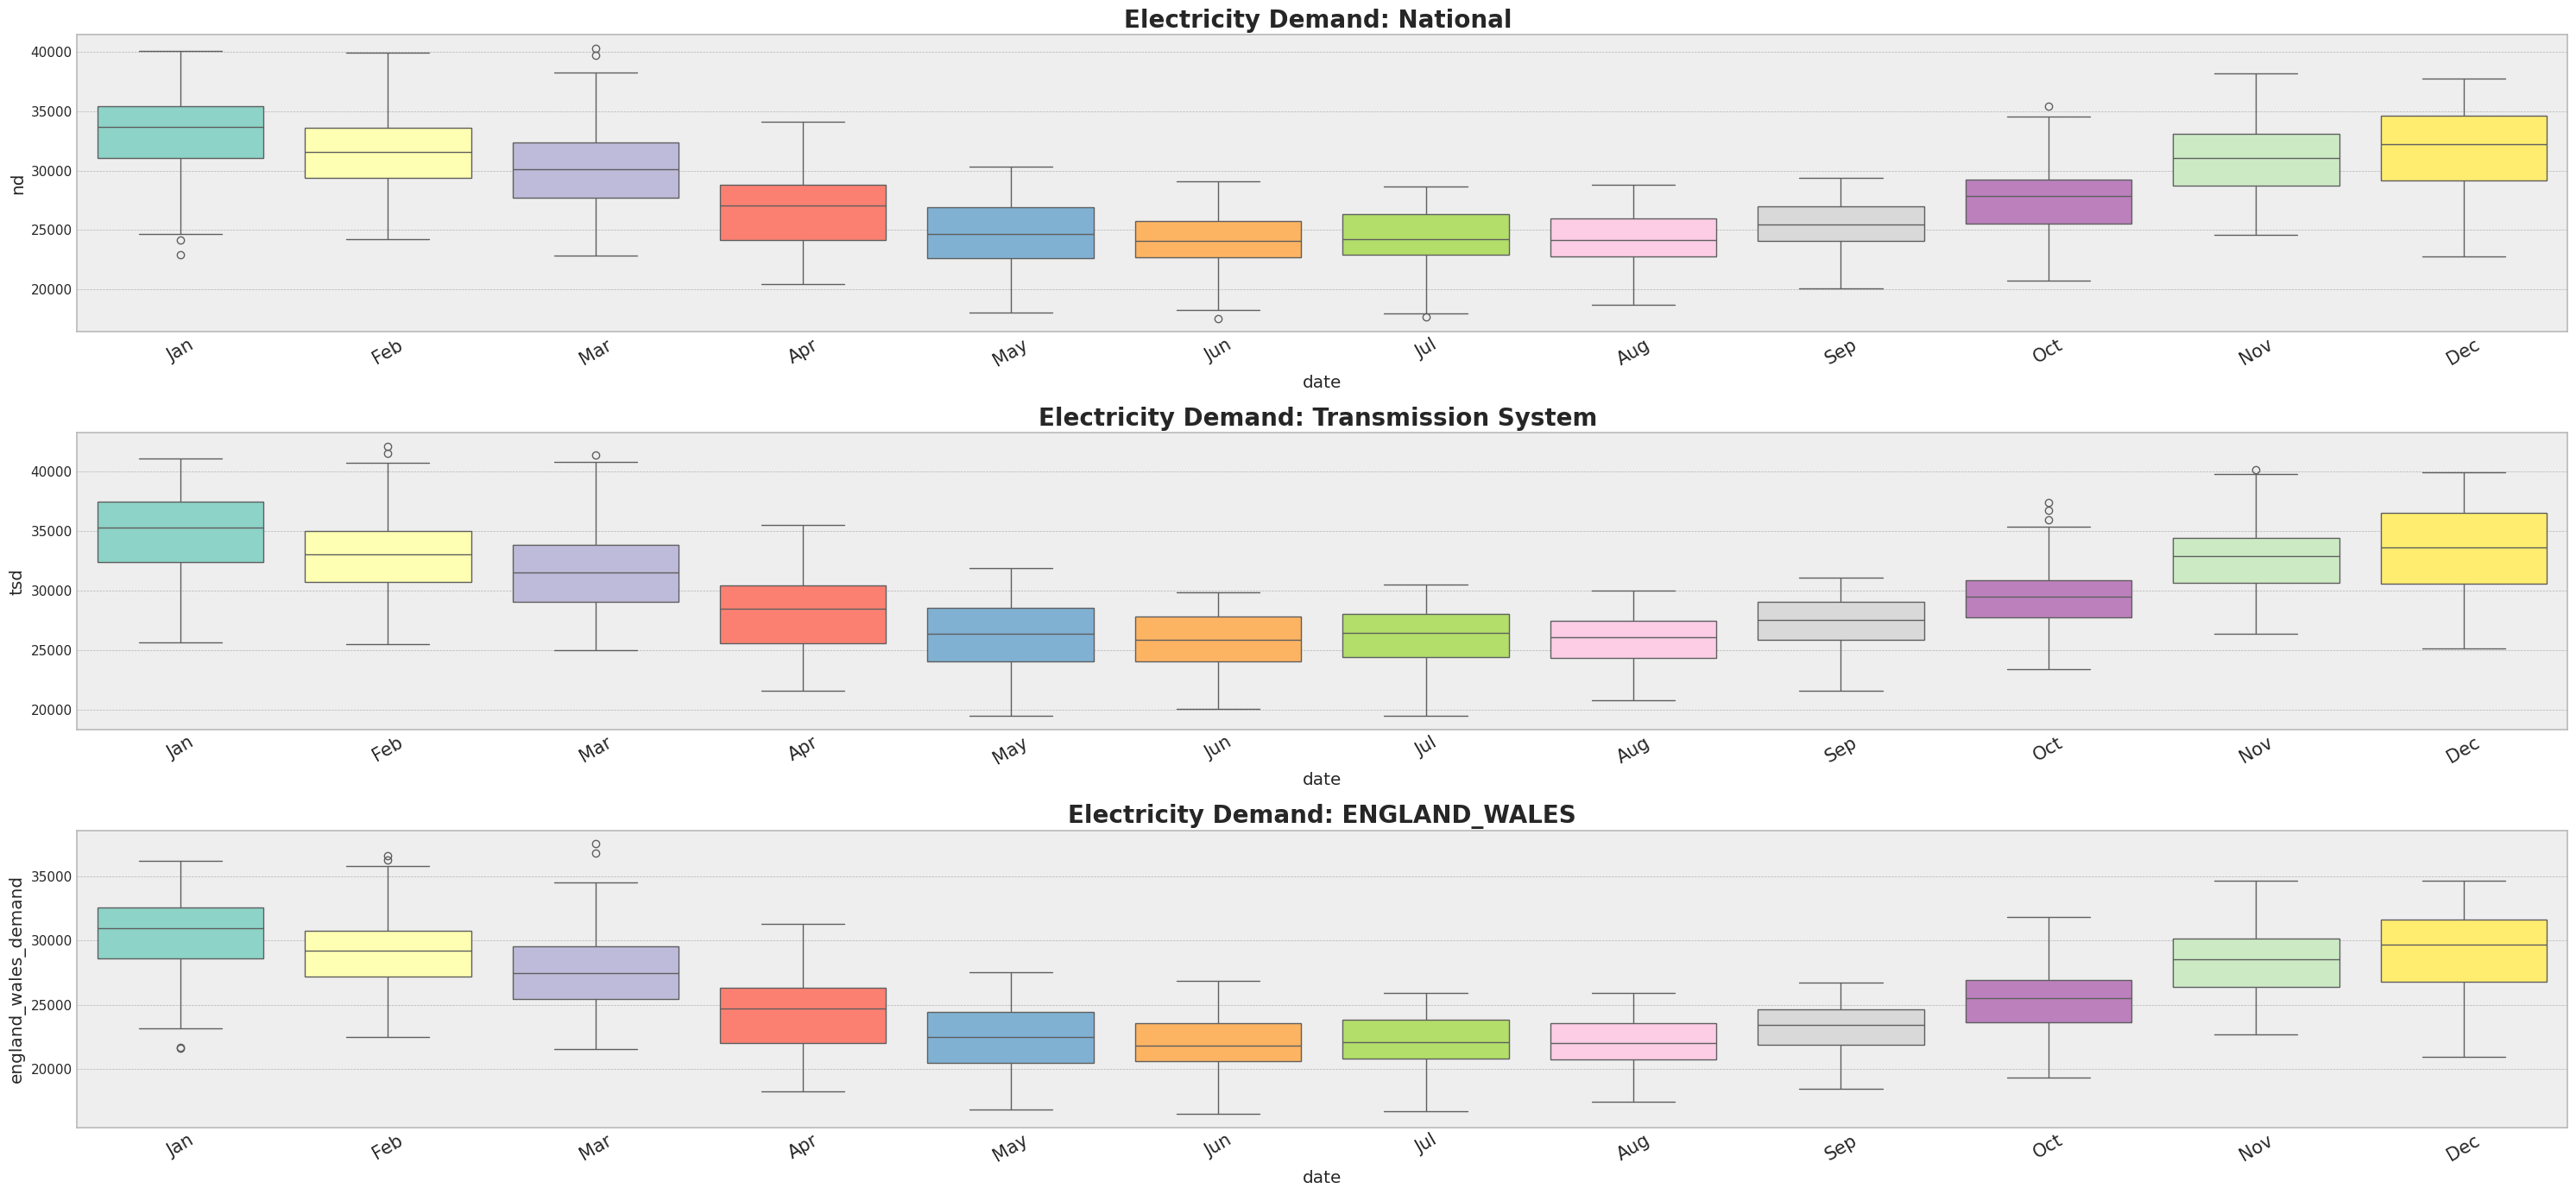

In [ ]:
import seaborn as sns
import calendar

# Convert 'settlement_date' column to datetime type and set it as the index
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(30, 14), sharex=False)

# Loop through columns and plot boxplots
for i, (col, label) in enumerate(zip(data.columns, lab)):
    sns.boxplot(data=data, x=data.index.month, y=col, ax=axs[i], palette='Set3', saturation=1)
    axs[i].set_xticklabels([calendar.month_abbr[z] for z in range(1, 13)], rotation=30, fontsize=15)
    axs[i].set_title(f'Electricity Demand: {label}', fontsize=20, fontweight='bold')

plt.tight_layout()
plt.show()


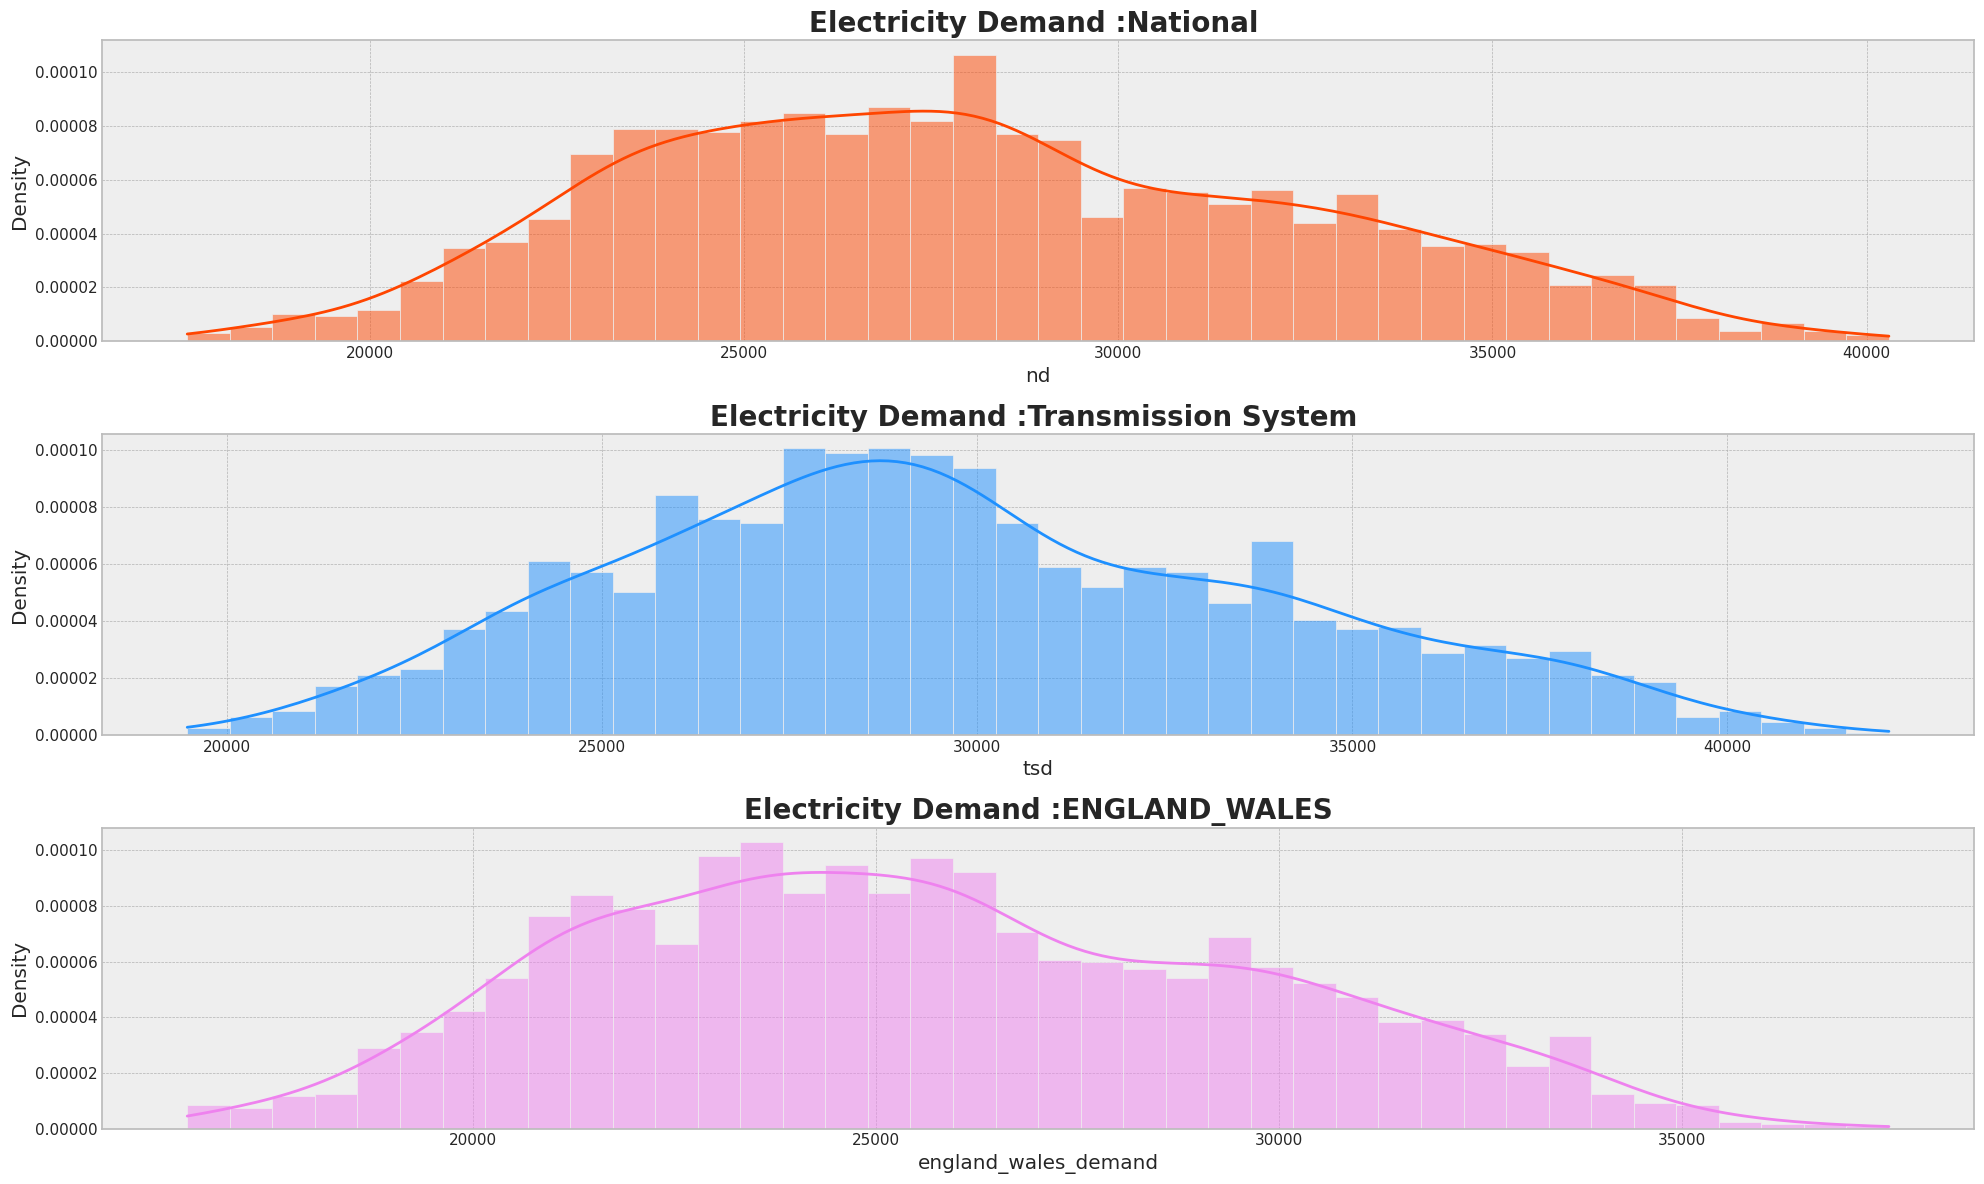

In [ ]:
f,axs=plt.subplots(3,1,figsize=(20,12),sharex=False)
for i,j,l,k in zip(data.columns,[0,1,2], ['orangered','dodgerblue','violet'],lab):
        sns.histplot(data=data,bins=40,x=i,ax=axs[j],kde=True,stat='density',color=l)
        axs[j].set_title(f'Electricity Demand :{k}',fontsize=20,fontweight='bold')
plt.tight_layout()
plt.show()

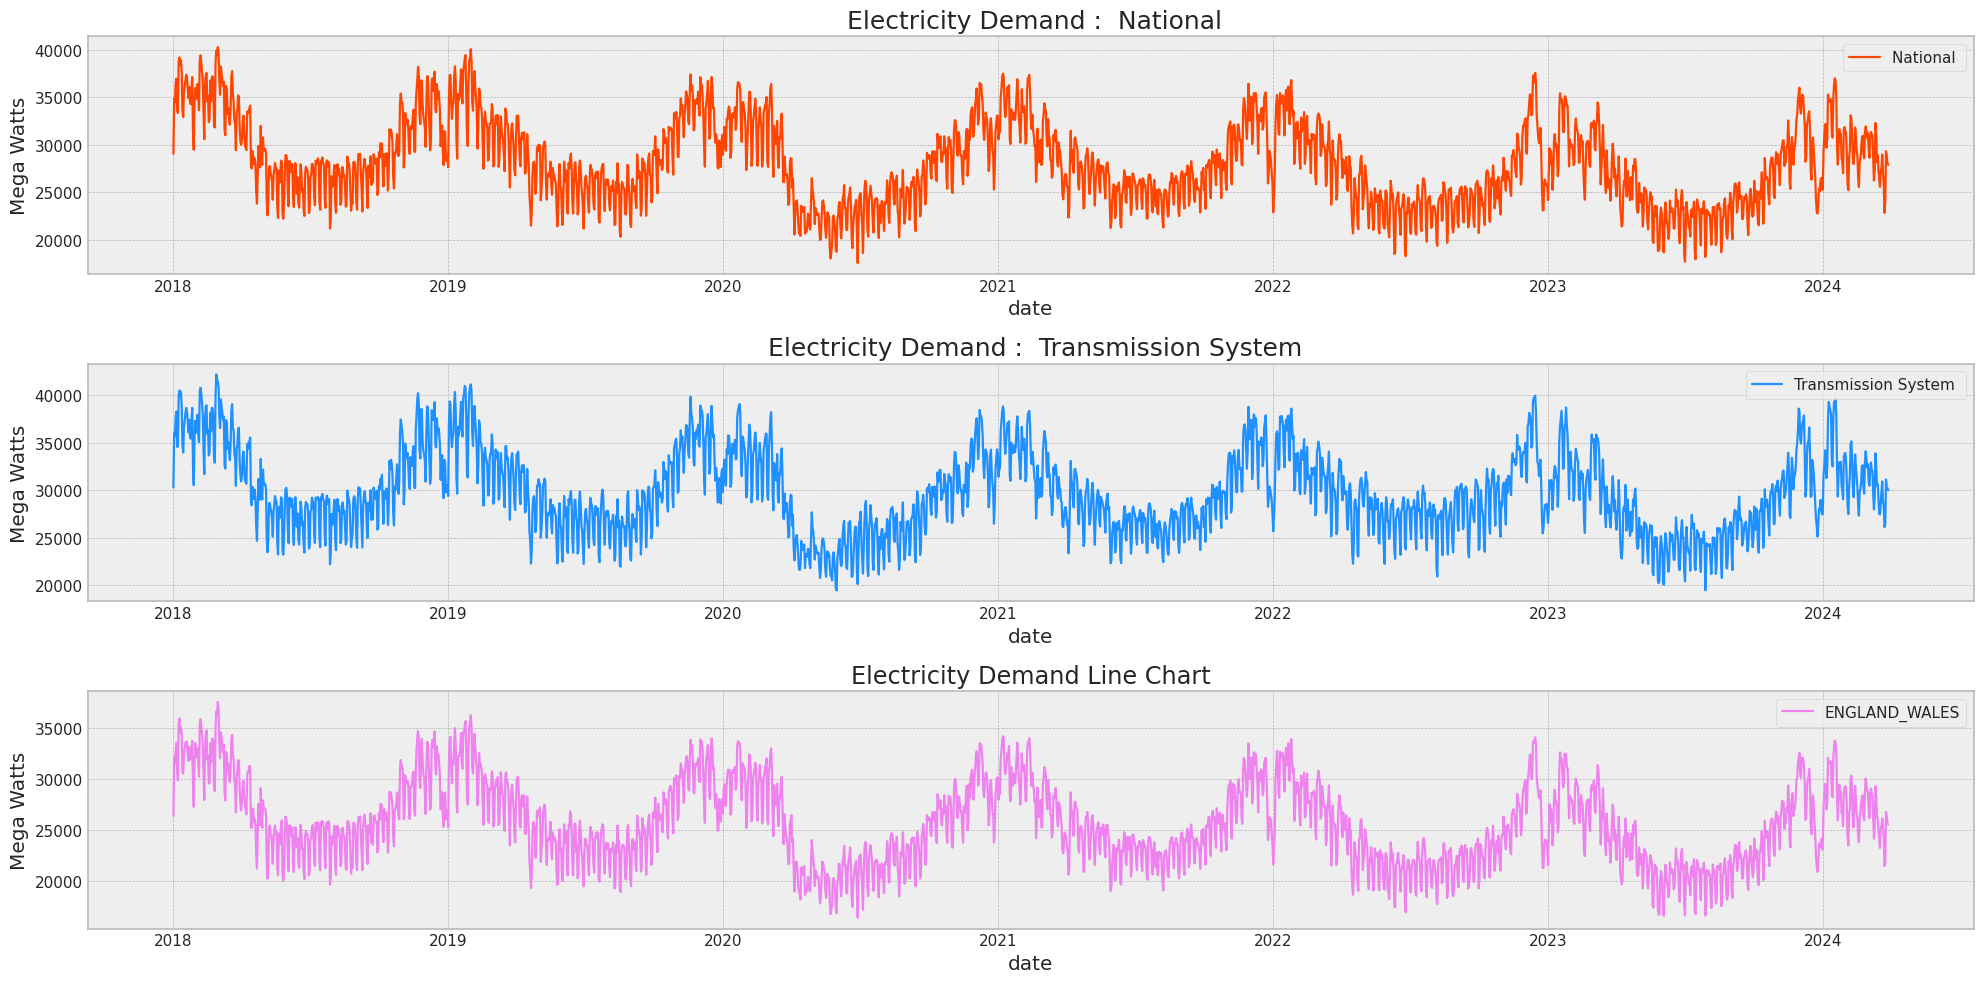

In [ ]:
fig,axs=plt.subplots(3,1,figsize=(20,10))
ys=data.columns       #i         #j       #k                                  #l
for i,j,l,k in zip(data.columns,[0,1,2], ['orangered','dodgerblue','violet'],lab):
    sns.lineplot(data=data,x=data.index,y=i,ax=axs[j],label=k,color=l,linewidth=1.6)
    axs[j].set_title(f'  Electricity Demand :  {k}',fontsize=18)
    axs[j].set_ylabel('Mega Watts')
plt.tight_layout()
plt.title('Electricity Demand Line Chart')
plt.show()

<Axes: title={'center': 'Endogeneous Variables performances 2023'}, xlabel='date', ylabel='MW'>

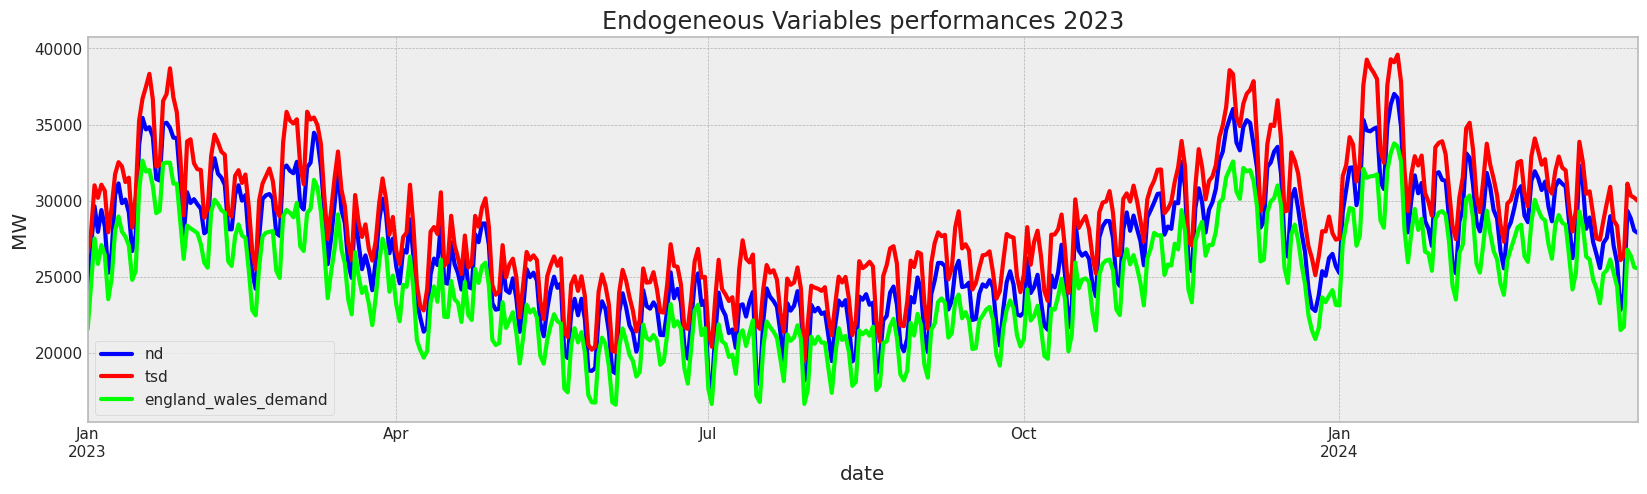

In [ ]:
data['2023-01-01':][['nd','tsd','england_wales_demand']].plot(figsize=(20,5),linewidth=3,
                                        title='Endogeneous Variables performances 2023',cmap='brg',ylabel='MW')

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
#seasonal decompose - visual test for stationarity
def seas_decomp(dataframe,p):
    sdf=pd.DataFrame()
    cols=['Trend(t)','Seasonal(S)','Residuals(e)','observed(o)']

    for i in ['additive','multiplicative']:
            if i=='additive':
                result=seasonal_decompose(x=dataframe,model=i,period=p)
                li=[result.trend,result.seasonal,result.resid,result.observed]
                for j,k in zip(cols,li):
                    sdf[f'+_{j}']=k
            elif i=='multiplicative':
                result=seasonal_decompose(x=dataframe,model=i,period=p)
                li=[result.trend,result.seasonal,result.resid,result.observed]
                for j,k in zip(cols,li):
                    sdf[f'*_{j}']=k

    return sdf

In [ ]:
nd=seas_decomp(data['nd'],90)
tsd=seas_decomp(data['tsd'],90)
ewd=seas_decomp(data['england_wales_demand'],90)

In [ ]:
def seas_decop_plot(dataframe,name):
    #col=['darkorange','yellowgreen','darksalmon','darkmagenta']
    lab=['National ','Transmission System ','ENGLAND_WALES']
    co=['crimson','orangered','k','darkblue','crimson','orangered','k','darkblue']#'darkred'
    fig,axs=plt.subplots(8,1,figsize=(100,80))
    print(name)
    for i,j,k in zip(dataframe.columns,range(0,8),co):
        sns.lineplot(data=dataframe, x=dataframe.index,y=i,ax=axs[j],color=k)
        axs[j].set_title(f'{name}: {i}',fontsize=80,fontweight='bold')
        axs[j].xaxis.set_tick_params(labelsize=30)
        axs[j].yaxis.set_tick_params(labelsize=30)
        #ax.xaxis.set_tick_params(labelsize=20)

    plt.tight_layout()
    plt.show()

In [ ]:
for i,j in zip((nd,tsd,ewd),['National ','Transmission System ','ENGLAND_WALES']):

    seas_decop_plot(i,j)
    print('')
    print('*'*162)


Output hidden; open in https://colab.research.google.com to view.

\\Stationarity Test

In [ ]:
from statsmodels.tsa.stattools import adfuller,kpss

In [ ]:


def stationary_test(dataframe,):

    print('AUGUMENTED-DICKEY-FULLER-TEST:')
    print('')

#hypothesis statement
    H0_adf='Data is not Stationary in nature, ie: unit root = 1'
    H1_adf='Data is Stationary in nature, ie: unitroot < 1, Further Procced for modeling!'

    for i in dataframe.columns:
        print('')
        print(i,':')
        print('')
        c=adfuller(dataframe[i])
        print('')
        #decision based on p value
        if c[1]>0.05:
                print(f"Decision: {H0_adf}")
        else:
                print(f"Decision: {H1_adf}")
        print('')
        for j,k in zip(['ADF test statistic','P value','No of lags used','No of Observations used',
                 'Information Criterion value'],c):
            print(f"{j}: {k}")

    print('')
    print('*'*160)
    print('')
    print('KIWATKOWSKI-PHILIPS-SCHMIDT-SHIN (KPSS) TEST')
    print('')

    #hypothesis statement
    h0_kp='Data is Stationary in nature, Futher steps for modelling is approved'
    h1_kp='Data is not Stationary in nature'

    for i in dataframe.columns:
        print('')
        print(i,':')
        k=kpss(dataframe[i],regression='c')
        print('')
        if k[1]>0.05:
            print('Decision',h0_kp)
        else:
            print('Decision',h1_kp)
        print('')
        for a,b in zip(['KPSS test statistic','P value','No of lags used',
                  'Critical values in %'],k):
            print(f"{a}: {b}")



In [ ]:
stationary_test(data)

AUGUMENTED-DICKEY-FULLER-TEST:


nd :


Decision: Data is Stationary in nature, ie: unitroot < 1, Further Procced for modeling!

ADF test statistic: -2.9228002576024736
P value: 0.04276015587700678
No of lags used: 27
No of Observations used: 2251
Information Criterion value: {'1%': -3.433258384187781, '5%': -2.862824846221197, '10%': -2.567453983958164}

tsd :


Decision: Data is Stationary in nature, ie: unitroot < 1, Further Procced for modeling!

ADF test statistic: -3.0770446183317266
P value: 0.028299292647975646
No of lags used: 27
No of Observations used: 2251
Information Criterion value: {'1%': -3.433258384187781, '5%': -2.862824846221197, '10%': -2.567453983958164}

england_wales_demand :


Decision: Data is Stationary in nature, ie: unitroot < 1, Further Procced for modeling!

ADF test statistic: -2.887903881472684
P value: 0.04677280126097456
No of lags used: 27
No of Observations used: 2251
Information Criterion value: {'1%': -3.433258384187781, '5%': -2.862824846221197, '

<ipython-input-31-dfb0180cf355>:39: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  k=kpss(dataframe[i],regression='c')
<ipython-input-31-dfb0180cf355>:39: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  k=kpss(dataframe[i],regression='c')
<ipython-input-31-dfb0180cf355>:39: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  k=kpss(dataframe[i],regression='c')
<ipython-input-31-dfb0180cf355>:39: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  k=kpss(dataframe[i],regression='c')
<ipython-input-31-dfb0180cf355>:39: 

In [ ]:
def induce_stationarity_df(dataframe,p):
    temp_df=pd.DataFrame()
    for i in dataframe.columns:
        temp_df[f'{i}']=dataframe[i].diff(periods=p,)
    return temp_df

In [ ]:
s=induce_stationarity_df(data,30)
s.dropna(axis=0,inplace=True)
print(s.isnull().sum())
s

nd                           0
tsd                          0
england_wales_demand         0
embedded_wind_generation     0
embedded_wind_capacity       0
embedded_solar_generation    0
embedded_solar_capacity      0
non_bm_stor                  0
pump_storage_pumping         0
is_holiday                   0
dtype: int64


nd          tsd  england_wales_demand  \
date                                                         
2018-01-31  5779.708333  5758.312500           5727.270833   
2018-02-01   465.166667   448.395833            430.916667   
2018-02-02  1917.208333  2234.000000           1506.729167   
2018-02-03 -1442.750000 -1626.145833          -1212.479167   
2018-02-04 -3331.166667 -3214.812500          -3316.479167   
...                 ...          ...                   ...   
2024-03-24 -7039.479167 -6216.020833          -6683.729167   
2024-03-25   313.979167   649.562500            431.104167   
2024-03-26   249.708333   704.770833            403.291667   
2024-03-27 -3260.395833 -2715.291667          -2912.812500   
2024-03-28 -4042.291667 -4091.770833          -4495.625000   

            embedded_wind_generation  embedded_wind_capacity  \
date                                                           
2018-01-31               1227.791667                    25.0   
2018-02-01               1051.187500                    25.0   
2018-02-02              -2067.000000                    25.0   
2018-02-03              -1103.125000                    25.0   
2018-02-04               -156.645833                    25.0   
...                              ...                     ...   
2024-03-24                733.020833                     0.0   
2024-03-25               1496.208333                     0.0   
2024-03-26                 52.687500                     0.0   
2024-03-27                402.000000                     0.0   
2024-03-28               1039.250000                     0.0   

            embedded_solar_generation  embedded_solar_capacity  non_bm_stor  \
date                                                                          
2018-01-31                 258.875000                      0.0     0.000000   
2018-02-01                 879.687500                      0.0    50.312500   
2018-02-02                 397.812500                      0.0     0.000000   
2018-02-03                  30.479167                      0.0     0.000000   
2018-02-04                 354.291667                      0.0    22.729167   
...                               ...                      ...          ...   
2024-03-24                1116.354167                      0.0     0.000000   
2024-03-25                -575.875000                      0.0     0.000000   
2024-03-26                 654.770833                      0.0     0.000000   
2024-03-27                 368.395833                      0.0     0.000000   
2024-03-28                 514.416667                      0.0     0.000000   

            pump_storage_pumping  is_holiday  
date                                          
2018-01-31            -83.520833        -1.0  
2018-02-01             -0.354167         0.0  
2018-02-02             56.333333         0.0  
2018-02-03             33.020833         0.0  
2018-02-04            136.812500         0.0  
...                          ...         ...  
2024-03-24             15.604167         0.0  
2024-03-25             29.854167         0.0  
2024-03-26           -115.500000         0.0  
2024-03-27            -20.583333         0.0  
2024-03-28            165.125000         0.0  

[2249 rows x 10 columns]

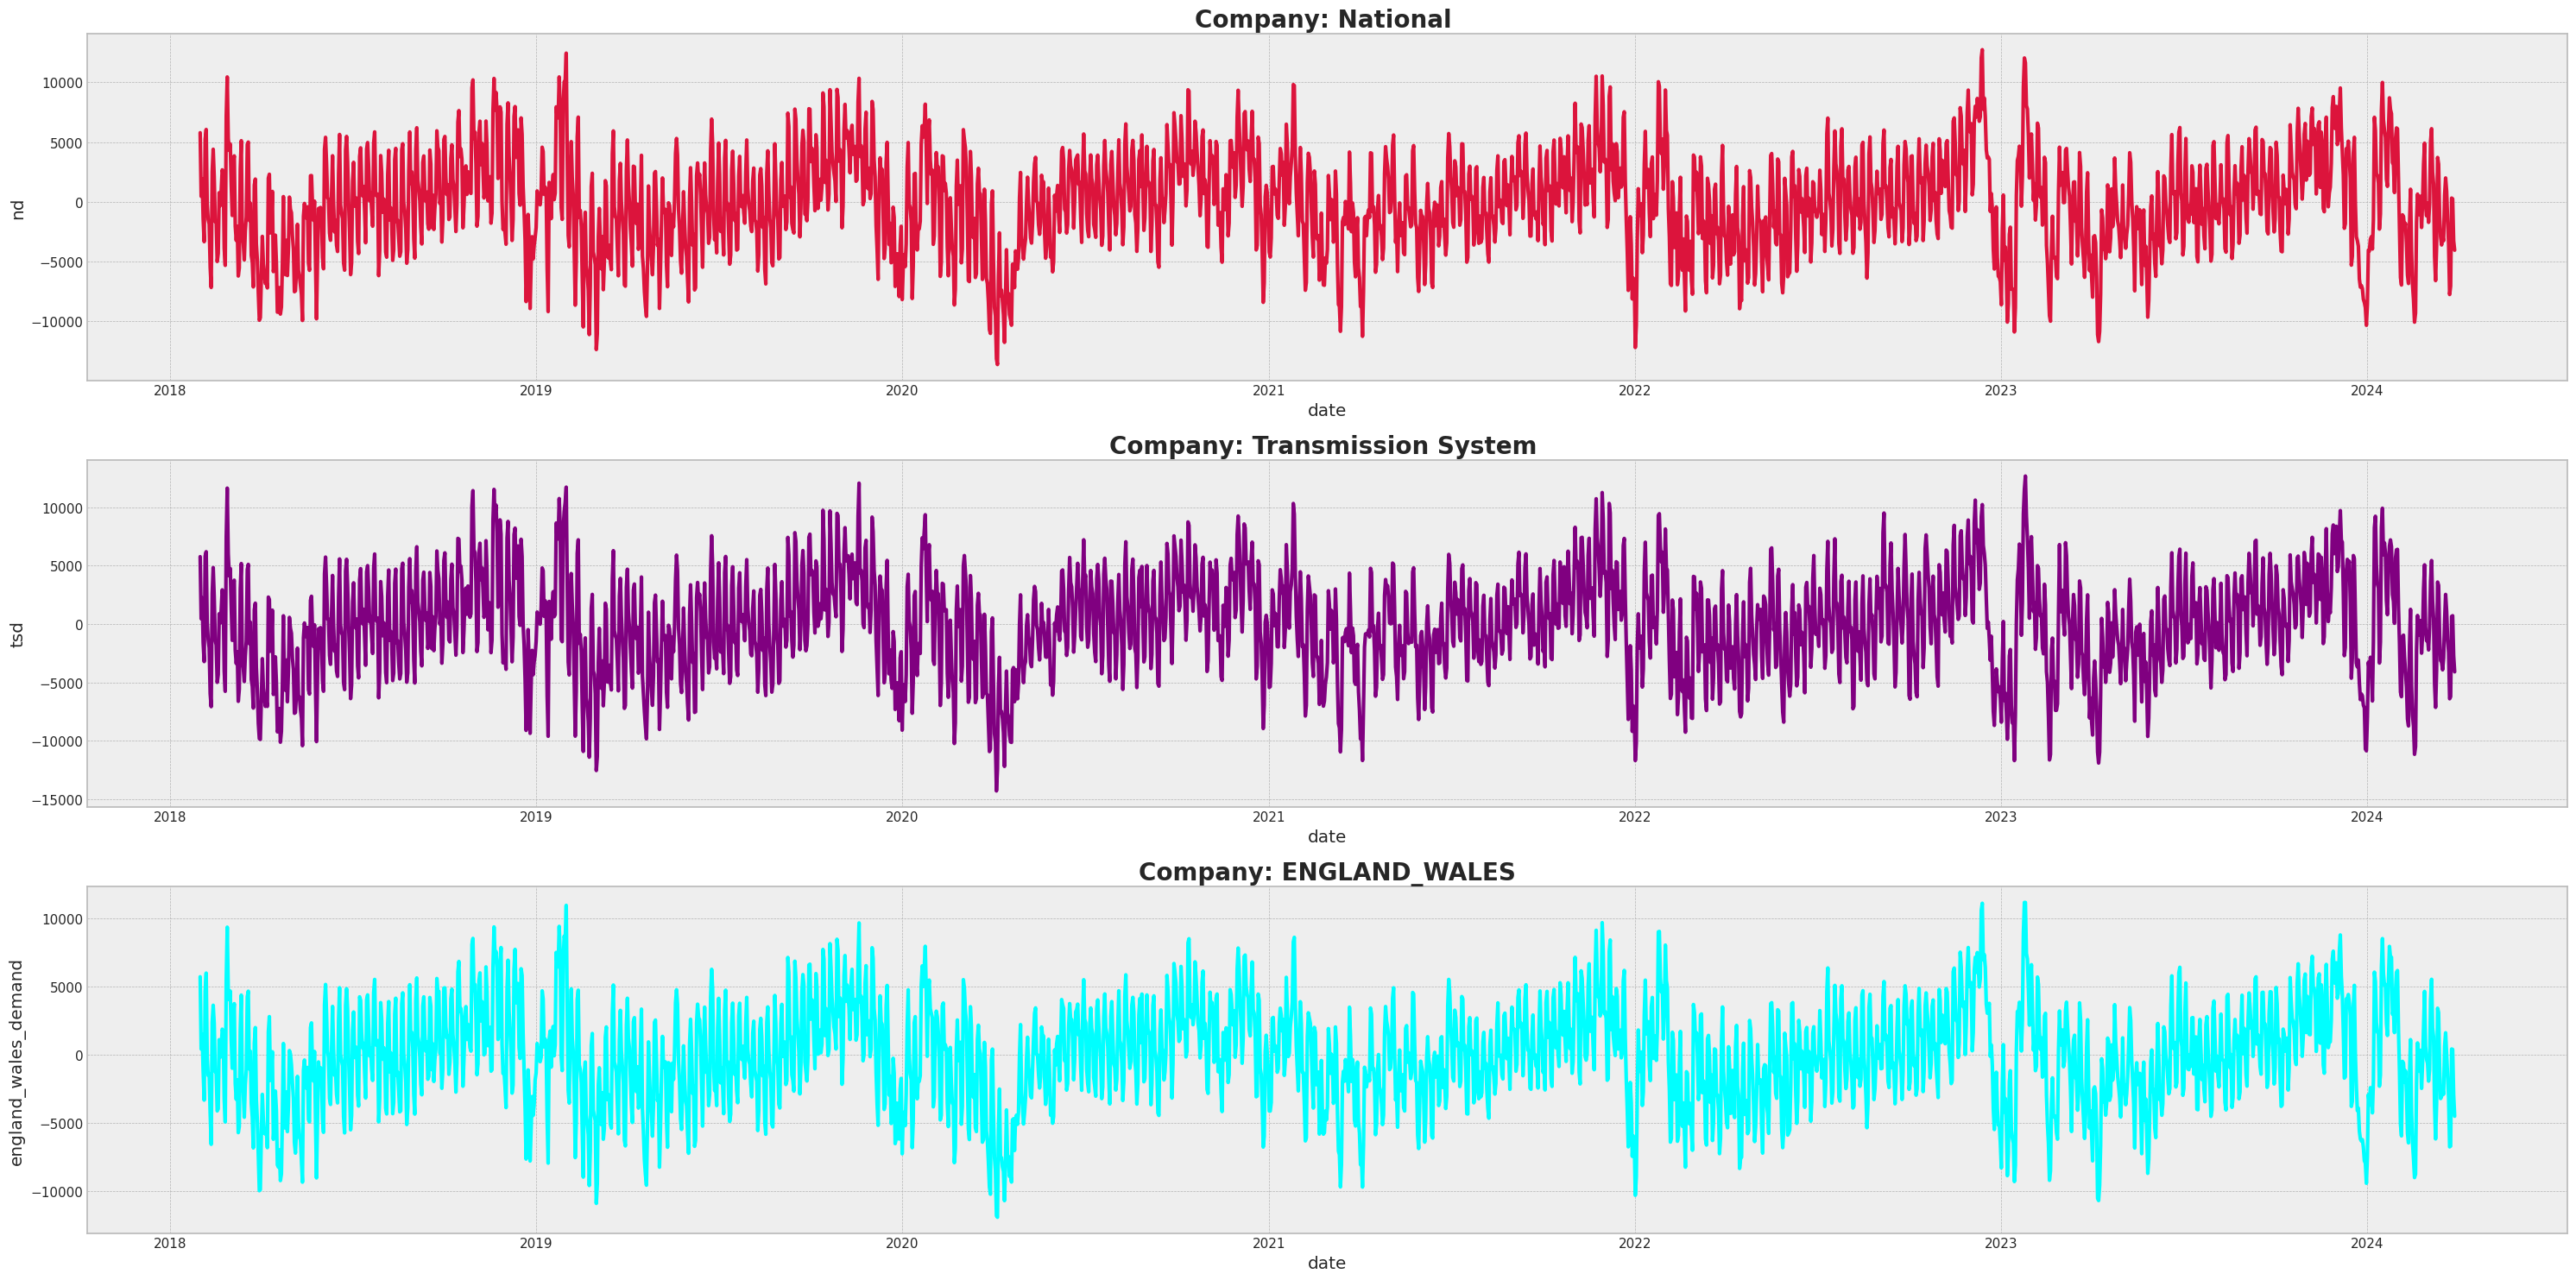

In [ ]:
f,a=plt.subplots(3,1,figsize=(30,15))
for i,j,k,l in zip(s.columns,range(0,3),['crimson','purple','cyan'],lab):
    sns.lineplot(data=s,x=s.index,y=i,ax=a[j],color=k,linewidth=3)
    a[j].set_title(f'Company: {l}',fontweight='bold',fontsize=20)
plt.tight_layout()

In [ ]:
stationary_test(s)

AUGUMENTED-DICKEY-FULLER-TEST:


nd :


Decision: Data is Stationary in nature, ie: unitroot < 1, Further Procced for modeling!

ADF test statistic: -7.334982903769328
P value: 1.1025626178878738e-10
No of lags used: 27
No of Observations used: 2221
Information Criterion value: {'1%': -3.433297714524859, '5%': -2.8628422127264828, '10%': -2.567463230412251}

tsd :


Decision: Data is Stationary in nature, ie: unitroot < 1, Further Procced for modeling!

ADF test statistic: -7.479861435029778
P value: 4.804122994167006e-11
No of lags used: 26
No of Observations used: 2222
Information Criterion value: {'1%': -3.4332963863833688, '5%': -2.8628416262827505, '10%': -2.567462918171205}

england_wales_demand :


Decision: Data is Stationary in nature, ie: unitroot < 1, Further Procced for modeling!

ADF test statistic: -7.049664440564231
P value: 5.568732711784786e-10
No of lags used: 26
No of Observations used: 2222
Information Criterion value: {'1%': -3.4332963863833688, '5%': -2.8628416262

<ipython-input-31-dfb0180cf355>:39: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  k=kpss(dataframe[i],regression='c')
<ipython-input-31-dfb0180cf355>:39: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  k=kpss(dataframe[i],regression='c')
<ipython-input-31-dfb0180cf355>:39: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  k=kpss(dataframe[i],regression='c')
<ipython-input-31-dfb0180cf355>:39: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  k=kpss(dataframe[i],regression='c')
<ipython-input-31-dfb0180cf355>:39: 

In [ ]:
nd=s['nd'].to_frame()

tsd=s['tsd'].to_frame()

ewd=s['england_wales_demand'].to_frame()

In [ ]:
from sktime.forecasting.model_selection import temporal_train_test_split

In [ ]:
nd_train,nd_test=temporal_train_test_split(nd,test_size=180)
tsd_train,tsd_test=temporal_train_test_split(tsd,test_size=180)
ewd_train,ewd_test=temporal_train_test_split(ewd,test_size=180)

In [ ]:
nd_test.shape,nd_train.shape

((180, 1), (2069, 1))

CORRELATIONS PLOT FUNCTION

In [ ]:
from sktime.utils.plotting import plot_correlations


def c_(s,lag,sup_title,c): # give the input as series object
    plt.figure(figsize=(20,4))
    plt.rcParams['axes.prop_cycle'] = plt.cycler(color=[c])
    plot_correlations(series=s, lags=lag,alpha=0.05,suptitle=sup_title,)
    plt.tight_layout()
    plt.show()


<Figure size 2000x400 with 0 Axes>

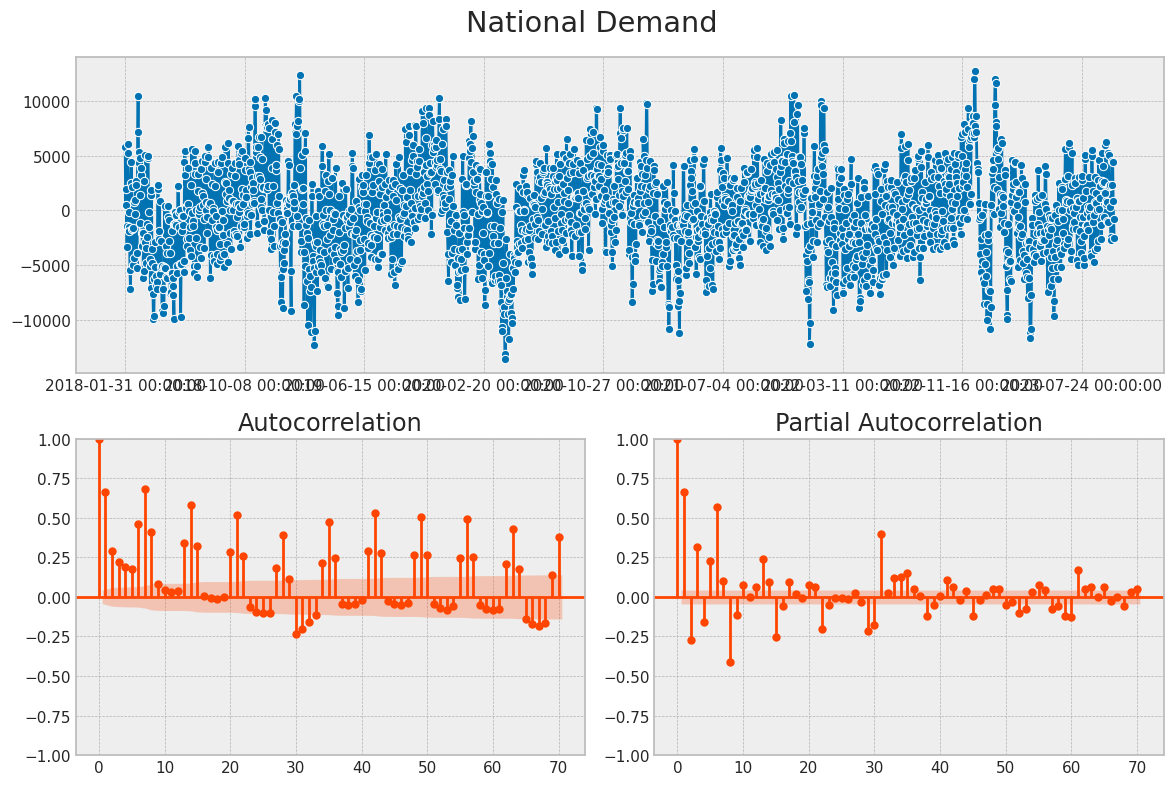

In [ ]:
c_(nd_train,70,'National Demand','orangered',)


<Figure size 2000x400 with 0 Axes>

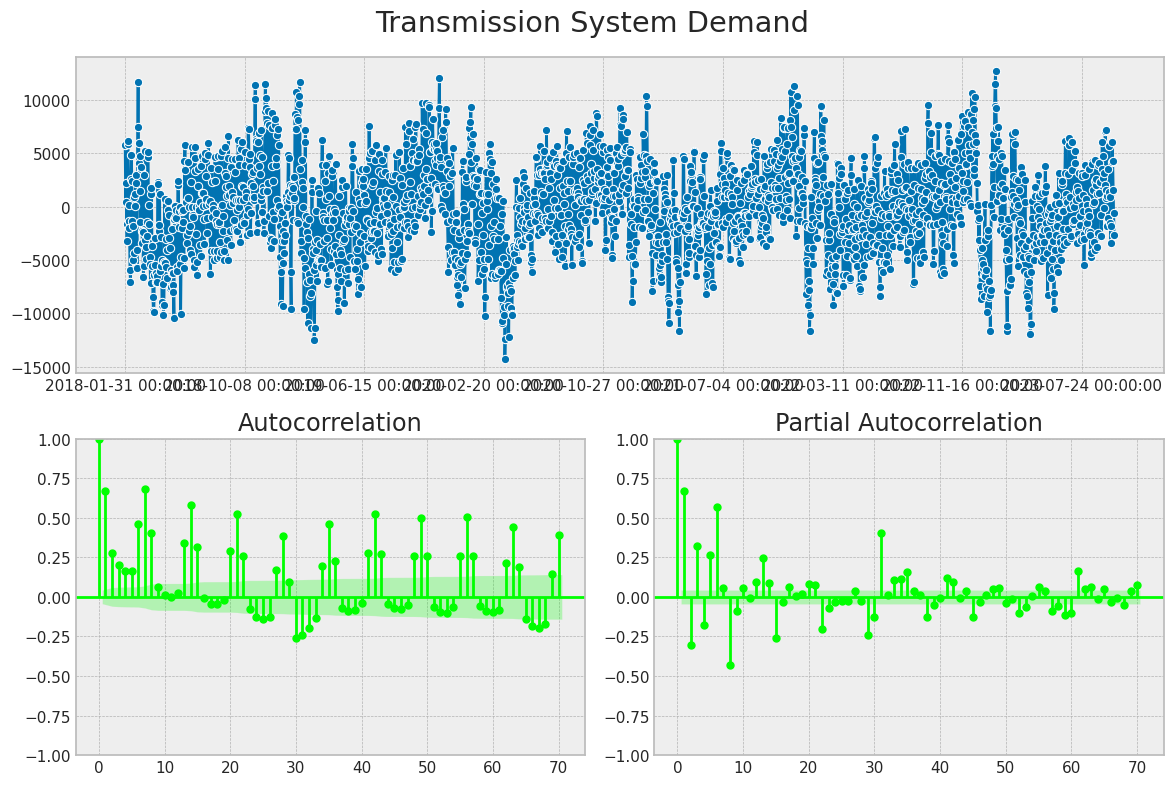

In [ ]:
c_(tsd_train,70,'Transmission System Demand','lime')


<Figure size 2000x400 with 0 Axes>

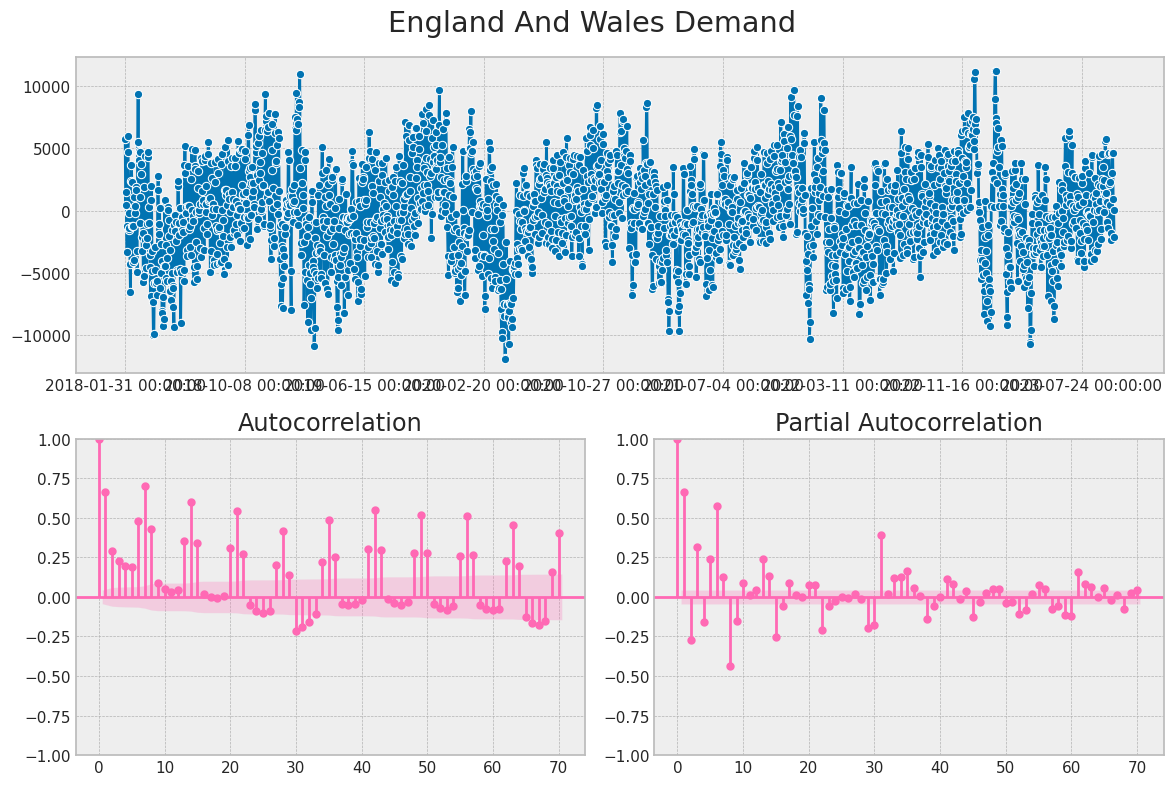

In [ ]:
c_(ewd_train,70,'England And Wales Demand','hotpink')


In [ ]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.ar_model import ar_select_order
plt.rcParams['axes.prop_cycle'] = plt.rcParamsDefault['axes.prop_cycle']
from sktime.utils.plotting import plot_series
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_absolute_error as mae
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [ ]:
def ARmodel(train,test,days,lag):

    #max lag significant selection
    mod = ar_select_order(train, maxlag=lag)
    #initializing  variables for best parameters
    min_ms=np.inf
    best_order = None
    d=None
    best_model=None


    for i in mod.ar_lags:

    #Ar model fitting
        ar=AutoReg(endog=train,lags=i,trend='ct',seasonal=False).fit()
        f=ar.predict(start=len(train),end=(len(train)+len(test)+days))
    #fitted values
        fttd=ar.fittedvalues
    #dataframe
        dates = pd.date_range(start=min(test.index), periods=len(f),freq='B')
        ses_dataframe = pd.DataFrame({'date': dates, 'Forecasts': f})
        ses_dataframe = ses_dataframe.set_index('date')


        ms = mse(test, ses_dataframe['Forecasts'].iloc[:len(test)])

        if ms < min_ms:
            min_ms=ms
            best_order=i
            best_model=ar
            d=ses_dataframe

    start_date = min(test.index)
    d = d.loc[start_date:]
    #best order and confidence Interval extraction for Insample and out sample prediction
    print(f"AutoRegression Best order (p): {best_order}")
    pred_int = best_model.get_prediction(start=len(train), end=(len(train)+len(test)+days))
    lower = pred_int.conf_int(alpha=0.05)['lower']
    upper = pred_int.conf_int(alpha=0.05)['upper']

    ma = mape(test, d['Forecasts'].iloc[:len(test)])
    m1ae = mae(test, d['Forecasts'].iloc[:len(test)])
    sq_ms = np.sqrt(min_ms)

    d=ses_dataframe
    u,l=list(upper),list(lower)
    d['upper'],d['lower']=u,l


     #best model summary
    print(best_model.summary())

     #train-test-Insamp and outsamp plot
    fig, a = plt.subplots(3, 1, figsize=(30, 20))
    train.plot(c='limegreen', ax=a[0])
    test.plot(c='salmon', ax=a[0])
    d['Forecasts'].plot(c='darkslateblue', ax=a[0])
    a[0].fill_between(d.index,d['lower'],d['upper'],color='thistle')
    a[0].set_title(
        f"Auto Regression-order {best_order}",
        fontweight='bold', fontsize=35)
    a[0].legend(['Train', 'Test',
                 f'Auto Regression-order {best_order}','95% CI'],
                loc='best', fontsize='20')


    #train-fitted model values plot
    train.plot(c='limegreen', ax=a[1])
    fttd.plot(ax=a[1], c='yellow')
    a[1].set_title(
        f"Fitted - Auto Regression-order {best_order}",
        fontweight='bold', fontsize=35)
    a[1].legend(['Train',
                 f'Auto Regression-order {best_order}'],
                loc='best', fontsize='20')

    #test vs Insamp and outsamples plot
    d['Forecasts'].plot(c='darkslateblue', ax=a[2])
    test.plot(c='salmon', ax=a[2])
    a[2].fill_between(d.index, d['lower'], d['upper'], color='thistle')
    a[2].set_title(
    f"Forecasted - Auto Regression-order {best_order}",
    fontweight='bold', fontsize=35)
    a[2].legend(
    [f'Forecast-Auto Regression-order {best_order}',
     'Test','95% CI'], loc='best', fontsize='20')

    plt.tight_layout()
    plt.show()
    #best model diagnositc plot for checking the residual
    fig=plt.figure(figsize=(20,10))
    fig = best_model.plot_diagnostics(fig=fig, lags=best_order)



    for n, N in zip(['MSE', 'MAPE', 'MAE', 'SQ_MSE'], [min_ms, ma, m1ae, sq_ms]):
        print(f"{n} is {N}")


    return d

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

AutoRegression Best order (p): 17
                            AutoReg Model Results                             
Dep. Variable:                     nd   No. Observations:                 2069
Model:                    AutoReg(17)   Log Likelihood              -18353.269
Method:               Conditional MLE   S.D. of innovations           1854.090
Date:                Sun, 21 Apr 2024   AIC                          36746.537
Time:                        21:08:19   BIC                          36859.068
Sample:                    02-17-2018   HQIC                         36787.803
                         - 09-30-2023                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -37.9481     83.088     -0.457      0.648    -200.798     124.902
trend          0.0187      0.069      0.271      0.787      -0.117       0.154
nd.L1          0.8

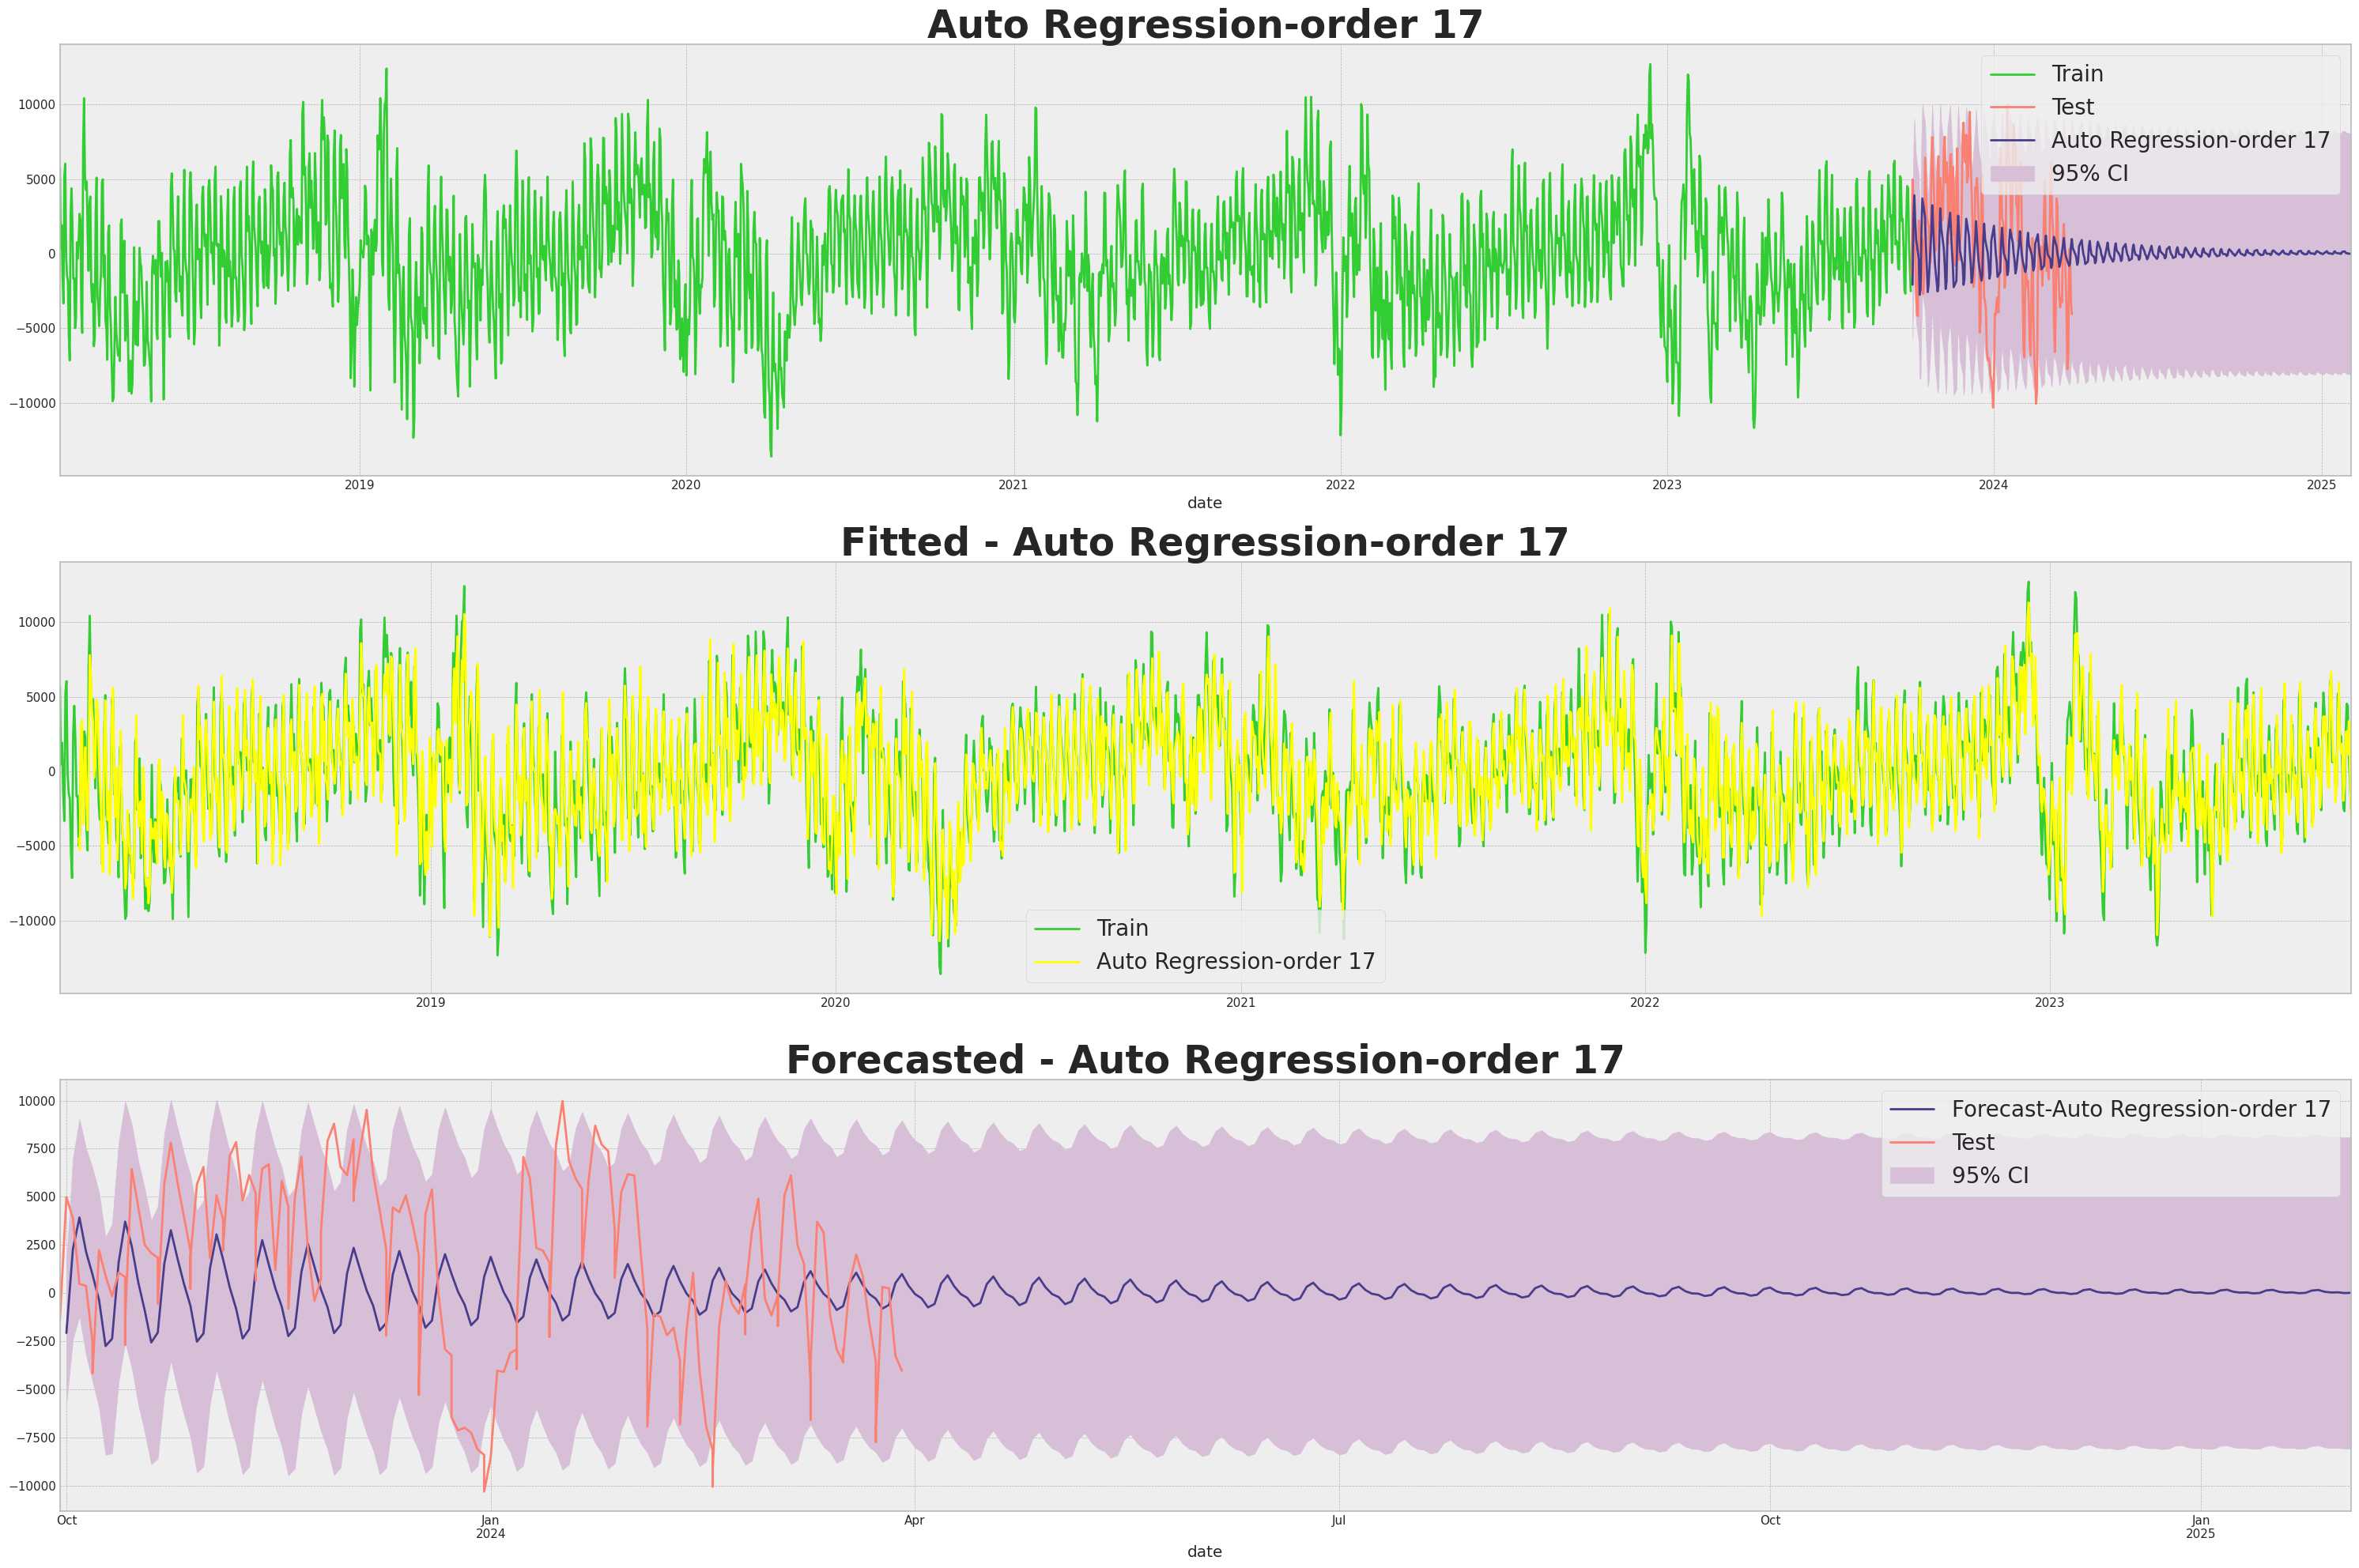

MSE is 18830475.290466078
MAPE is 1.3256571003021724
MAE is 3609.211935357603
SQ_MSE is 4339.40955551168


Forecasts        upper        lower
date                                             
2023-10-02 -2074.486069  1559.464081 -5708.436220
2023-10-03  2294.282881  6993.775371 -2405.209608
2023-10-04  3926.359168  9048.401954 -1195.683619
2023-10-05  2160.925843  7529.909893 -3208.058206
2023-10-06   960.192799  6492.923482 -4572.537885
...                 ...          ...          ...
2025-01-28    63.362109  8146.338073 -8019.613855
2025-01-29    27.967390  8110.943844 -8055.009065
2025-01-30    39.324366  8122.332197 -8043.683466
2025-01-31    -2.224168  8080.791088 -8085.239423
2025-02-03    13.742666  8096.835016 -8069.349684

[351 rows x 3 columns]

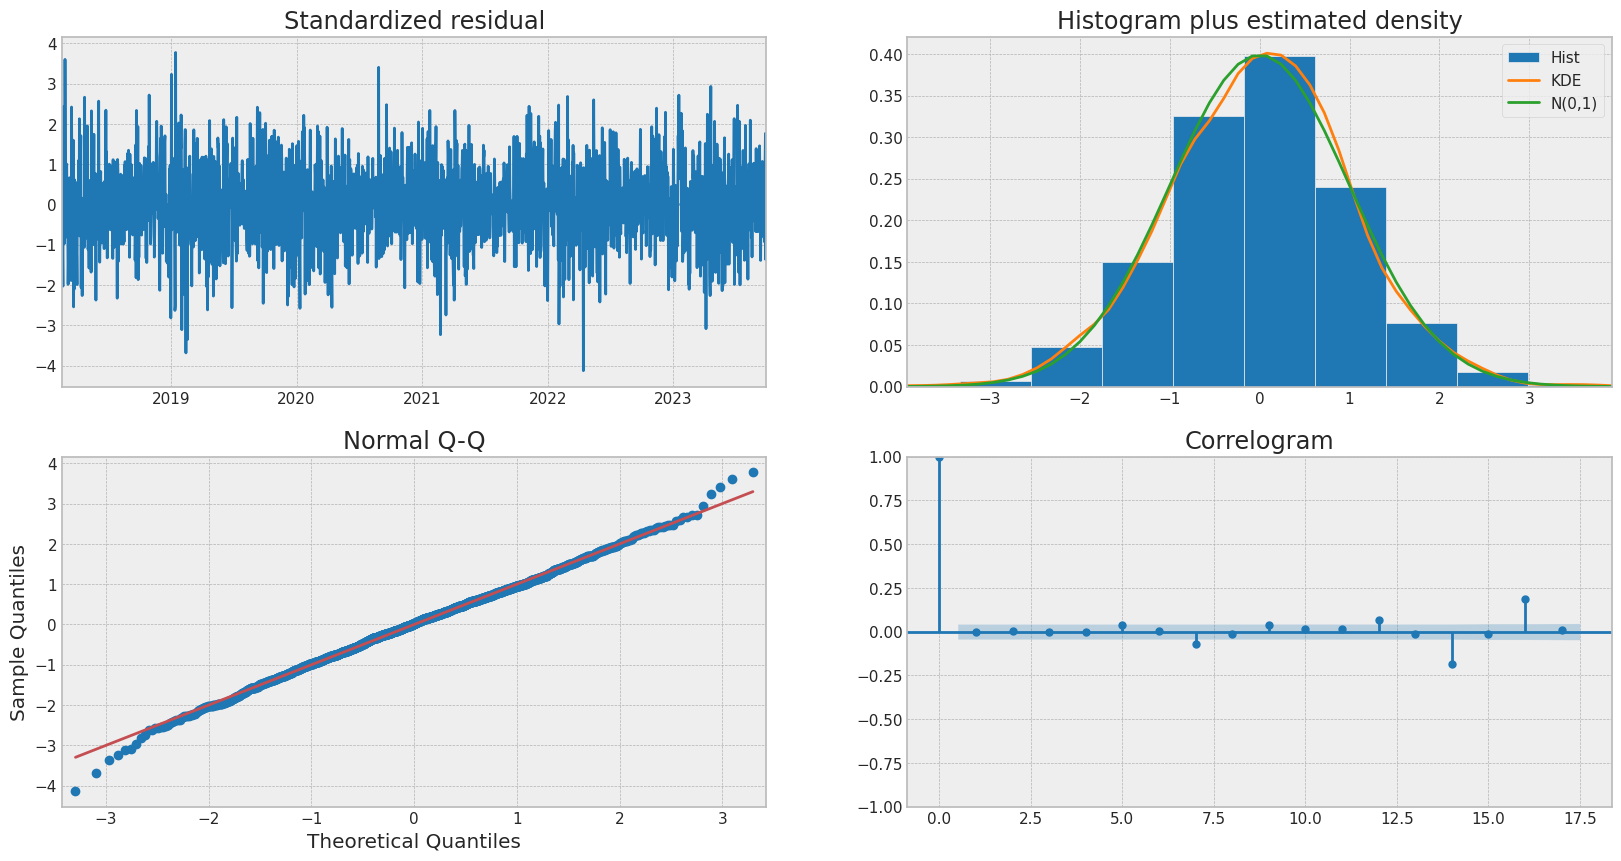

In [ ]:
ARmodel(nd_train,nd_test,170,20)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA as arima


In [ ]:
def mov_avg(train,test,days,s):

    min_aic=np.inf
    best_order=None
    best_model=None

    #model
    for i in range(1,s):

        ma=arima(endog=train,order=(0,0,i),seasonal_order=(0,0,0,0),trend='ct')
        mod=ma.fit()
        mod_aic=mod.aic

        if mod_aic < min_aic:
            min_aic=mod_aic
            best_model=mod
            best_order= i

    print(f" Best order of MA model: {best_order} and Minimum AIC: {min_aic}")


     #forecast and ci's
    f=best_model.get_forecast(steps=len(test)+days)
    forecasts=f.predicted_mean
    fttd=best_model.fittedvalues
    ci_model=f.conf_int()
    print(best_model.summary())

    #dataframe creation
    dates=pd.date_range(start=min(test.index),periods=len(forecasts),freq='B')
    d= pd.DataFrame()
    d['date']=dates
    d = d.set_index('date')
    d['Forecasts'] =forecasts.to_list()
    d['lower'] =list(f.conf_int().values[:,0])
    d['upper']=list(f.conf_int().values[:,1])
         #best model diagnositc plot for checking the residual
     #train vs test vs forecast(out of samples)
    fig, a = plt.subplots(3, 1, figsize=(50, 30))
    train.plot(c='limegreen', ax=a[0])
    test.plot(c='salmon', ax=a[0])
    d['Forecasts'].plot(c='darkslateblue', ax=a[0])
    a[0].fill_between(d.index,d['lower'],d['upper'],color='thistle')
    a[0].set_title(
        f"Moving Average-order {best_order}",
        fontweight='bold', fontsize=35)
    a[0].legend(['Train', 'Test',
                 f'Moving Average-order {best_order}','95% CI'],
                loc='lower left', fontsize='20',)

     #train-fitted model values plot
    train.plot(c='limegreen', ax=a[1])
    fttd.plot(ax=a[1], c='yellow')
    a[1].set_title(
        f"Fitted - Moving Average-order {best_order}",
        fontweight='bold', fontsize=35)
    a[1].legend(['Train',
                 f'Moving Average-order {best_order}'],
                loc='best', fontsize='20')

    #test vs  outsamples plot
    d['Forecasts'].plot(c='darkslateblue', ax=a[2])
    test.plot(c='salmon', ax=a[2])
    a[2].fill_between(d.index, d['lower'], d['upper'], color='thistle')
    a[2].set_title(
    f"Forecasted - Moving Average-order {best_order}",
    fontweight='bold', fontsize=35)
    a[2].legend(
    [f'Forecast-Moving Average-order {best_order}',
     'Test','95% CI'], loc='best', fontsize='20')

    plt.tight_layout()
    plt.show()
     #metrics
    ms=mse(test,d['Forecasts'].iloc[:len(test)])
    ma = mape(test, d['Forecasts'].iloc[:len(test)])
    m1ae = mae(test, d['Forecasts'].iloc[:len(test)])
    sq_ms = np.sqrt(ms)

    for n, N in zip(['MSE', 'MAPE', 'MAE', 'SQ_MSE'], [ms, ma, m1ae, sq_ms]):
        print(f"{n} is {N}")
    fig=plt.figure(figsize=(20,10))
    fig = best_model.plot_diagnostics(fig=fig, lags=best_order)
    return d


In [ ]:
mov_avg(nd_train,nd_test,170,31)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import itertools
def arma(train,test,days,n):

    min_aic=np.inf
    best_ar_p=None
    best_ma_q=None
    best_model=None

    comb_list=[int(x) for x in range(1,n)]

    for i in itertools.combinations_with_replacement(comb_list,2):

        arma=arima(endog=train,order=(i[0],0,i[1]),seasonal_order=(0,0,0,0),trend='ct',)#{'n','c','t','ct'}
        mod=arma.fit()
        mod_aic=mod.aic

        if mod_aic < min_aic:
            min_aic=mod_aic
            best_model=mod
            best_ar_p= i[0]
            best_ma_q=i[1]
    print(f" Best order of MA model: {best_ar_p,best_ma_q} and Minimum AIC: {min_aic}")



     #forecast and ci's
    f=best_model.get_forecast(steps=len(test)+days)
    forecasts=f.predicted_mean
    fttd=best_model.fittedvalues
    ci_model=f.conf_int()
    print(best_model.summary())

    #dataframe creation
    dates=pd.date_range(start=min(test.index),periods=len(forecasts),freq='B')
    d= pd.DataFrame()
    d['date']=dates
    d = d.set_index('date')
    d['Forecasts'] =forecasts.to_list()
    d['lower'] =list(f.conf_int().values[:,0])
    d['upper']=list(f.conf_int().values[:,1])
         #best model diagnositc plot for checking the residual
     #train vs test vs forecast(out of samples)
    fig, a = plt.subplots(3, 1, figsize=(50, 30))
    train.plot(c='limegreen', ax=a[0])
    test.plot(c='salmon', ax=a[0])
    d['Forecasts'].plot(c='darkslateblue', ax=a[0])
    a[0].fill_between(d.index,d['lower'],d['upper'],color='thistle')
    a[0].set_title(
        f"ARMA(p,q)-order ({best_ar_p,best_ma_q})",
        fontweight='bold', fontsize=35)
    a[0].legend(['Train', 'Test',
                 f"ARMA(p,q)-order ({best_ar_p,best_ma_q})",'95% CI'],
                loc='lower left', fontsize='20',)

     #train-fitted model values plot
    train.plot(c='limegreen', ax=a[1])
    fttd.plot(ax=a[1], c='yellow')
    a[1].set_title(
        f"Fitted - ARMA(p,q)-order ({best_ar_p,best_ma_q})",
        fontweight='bold', fontsize=35)
    a[1].legend(['Train',
                 f"ARMA(p,q)-order ({best_ar_p,best_ma_q})"],
                loc='best', fontsize='20')

    #test vs  outsamples plot
    d['Forecasts'].plot(c='darkslateblue', ax=a[2])
    test.plot(c='salmon', ax=a[2])
    a[2].fill_between(d.index, d['lower'], d['upper'], color='thistle')
    a[2].set_title(
    f"Forecasted - ARMA(p,q)-order ({best_ar_p,best_ma_q})",
    fontweight='bold', fontsize=35)
    a[2].legend(
    [f"ARMA(p,q)-order ({best_ar_p,best_ma_q})",
     'Test','95% CI'], loc='best', fontsize='20')

    plt.tight_layout()
    plt.show()
     #metrics
    ms=mse(test,d['Forecasts'].iloc[:len(test)])
    ma = mape(test, d['Forecasts'].iloc[:len(test)])
    m1ae = mae(test, d['Forecasts'].iloc[:len(test)])
    sq_ms = np.sqrt(ms)

    for n, N in zip(['MSE', 'MAPE', 'MAE', 'SQ_MSE'], [ms, ma, m1ae, sq_ms]):
        print(f"{n} is {N}")
    fig=plt.figure(figsize=(20,10))
    fig = best_model.plot_diagnostics(fig=fig)
    return d

In [ ]:
arma(nd_train,nd_test,170,26) #NATIONAL DEMAND

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import itertools
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
import numpy as np

def arima(train, test, days, n, d_range):
    min_aic = np.inf
    best_ar_p = None
    best_ma_q = None
    best_d = None
    best_model = None

    comb_list = [int(x) for x in range(1, n)]

    for i in itertools.combinations_with_replacement(comb_list, 2):
        for d in d_range:
            arima_model = ARIMA(train, order=(i[0], d, i[1]))
            try:
                mod = arima_model.fit()
            except:
                continue

            mod_aic = mod.aic

            if mod_aic < min_aic:
                min_aic = mod_aic
                best_model = mod
                best_ar_p = i[0]
                best_ma_q = i[1]
                best_d = d

    print(f"Best order of ARIMA model: {best_ar_p, best_d, best_ma_q} and Minimum AIC: {min_aic}")

    # Forecast and CI's
    f = best_model.get_forecast(steps=len(test) + days)
    forecasts = f.predicted_mean
    fttd = best_model.fittedvalues
    ci_model = f.conf_int()
    print(best_model.summary())

    # DataFrame creation
    dates = pd.date_range(start=min(test.index), periods=len(forecasts), freq='B')
    d = pd.DataFrame()
    d['date'] = dates
    d = d.set_index('date')
    d['Forecasts'] = forecasts.to_list()
    d['lower'] = list(f.conf_int().values[:, 0])
    d['upper'] = list(f.conf_int().values[:, 1])

    # Best model diagnostic plot for checking the residuals
    fig, a = plt.subplots(3, 1, figsize=(50, 30))
    train.plot(c='limegreen', ax=a[0])
    test.plot(c='salmon', ax=a[0])
    d['Forecasts'].plot(c='darkslateblue', ax=a[0])
    a[0].fill_between(d.index, d['lower'], d['upper'], color='thistle')
    a[0].set_title(
        f"ARIMA(p,d,q)-order ({best_ar_p, best_d, best_ma_q})",
        fontweight='bold', fontsize=35)
    a[0].legend(['Train', 'Test', f"ARIMA(p,d,q)-order ({best_ar_p, best_d, best_ma_q})", '95% CI'],
                loc='lower left', fontsize='20')

    # Train-fitted model values plot
    train.plot(c='limegreen', ax=a[1])
    fttd.plot(ax=a[1], c='yellow')
    a[1].set_title(
        f"Fitted - ARIMA(p,d,q)-order ({best_ar_p, best_d, best_ma_q})",
        fontweight='bold', fontsize=35)
    a[1].legend(['Train', f"ARIMA(p,d,q)-order ({best_ar_p, best_d, best_ma_q})"],
                loc='best', fontsize='20')

    # Test vs out samples plot
    d['Forecasts'].plot(c='darkslateblue', ax=a[2])
    test.plot(c='salmon', ax=a[2])
    a[2].fill_between(d.index, d['lower'], d['upper'], color='thistle')
    a[2].set_title(
        f"Forecasted - ARIMA(p,d,q)-order ({best_ar_p, best_d, best_ma_q})",
        fontweight='bold', fontsize=35)
    a[2].legend(
        [f"ARIMA(p,d,q)-order ({best_ar_p, best_d, best_ma_q})", 'Test', '95% CI'], loc='best', fontsize='20')

    plt.tight_layout()
    plt.show()

    # Metrics
    ms = mse(test, d['Forecasts'].iloc[:len(test)])
    ma = mape(test, d['Forecasts'].iloc[:len(test)])
    m1ae = mae(test, d['Forecasts'].iloc[:len(test)])
    sq_ms = np.sqrt(ms)

    for n, N in zip(['MSE', 'MAPE', 'MAE', 'SQ_MSE'], [ms, ma, m1ae, sq_ms]):
        print(f"{n} is {N}")

    fig = plt.figure(figsize=(20, 10))
    fig = best_model.plot_diagnostics(fig=fig)
    return d



In [ ]:
d_range = [30]  # Example range

# Call the function with your data
arima(nd_train, nd_test, 170, 26, d_range)

NameError: name 'arima' is not defined